Oilers Prediction Model based on last 10 game record, past 5 matchups between opposition, and home/away 

In [282]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 


In [283]:
df = pd.read_csv('/Users/jordansiwak/Documents/QMIND/NHL predictions 22:23/Oilers Model /Oil_data_feb27_2023.csv')

In [284]:
# choose which columns to initially include
df1 = df[['team','home_or_away', 'season', 'playerTeam', 'opposingTeam', 'situation', 'goalsFor', 'goalsAgainst', 'shotsOnGoalFor', 'shotsOnGoalAgainst' ]]

In [285]:
# make a new column 'home' where 1 means home and 0 means away 
df1['home'] = np.where(df1['home_or_away'] == 'HOME', 1, 0)

df1 = df1.drop('home_or_away', axis=1)
df1



<ipython-input-285-a78af9c2b14f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['home'] = np.where(df1['home_or_away'] == 'HOME', 1, 0)


,team,season,playerTeam,opposingTeam,situation,goalsFor,goalsAgainst,shotsOnGoalFor,shotsOnGoalAgainst,home
0,EDM,2008,EDM,COL,other,0.0,0.0,0.0,0.0,1
1,EDM,2008,EDM,COL,all,3.0,2.0,19.0,33.0,1
2,EDM,2008,EDM,COL,5on5,2.0,2.0,15.0,24.0,1
3,EDM,2008,EDM,COL,4on5,0.0,0.0,1.0,9.0,1
4,EDM,2008,EDM,COL,5on4,1.0,0.0,3.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
5680,EDM,2022,EDM,CBJ,other,2.0,0.0,6.0,0.0,0
5681,EDM,2022,EDM,CBJ,all,5.0,6.0,47.0,26.0,0
5682,EDM,2022,EDM,CBJ,5on5,2.0,5.0,37.0,20.0,0
5683,EDM,2022,EDM,CBJ,4on5,1.0,1.0,1.0,6.0,0


In [286]:
# make new column to put wins into a numerical value 

df1['win'] = np.where(df1['goalsFor'] >= df1['goalsAgainst'], 1, 0)

df1

,team,season,playerTeam,opposingTeam,situation,goalsFor,goalsAgainst,shotsOnGoalFor,shotsOnGoalAgainst,home,win
0,EDM,2008,EDM,COL,other,0.0,0.0,0.0,0.0,1,1
1,EDM,2008,EDM,COL,all,3.0,2.0,19.0,33.0,1,1
2,EDM,2008,EDM,COL,5on5,2.0,2.0,15.0,24.0,1,1
3,EDM,2008,EDM,COL,4on5,0.0,0.0,1.0,9.0,1,1
4,EDM,2008,EDM,COL,5on4,1.0,0.0,3.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5680,EDM,2022,EDM,CBJ,other,2.0,0.0,6.0,0.0,0,1
5681,EDM,2022,EDM,CBJ,all,5.0,6.0,47.0,26.0,0,0
5682,EDM,2022,EDM,CBJ,5on5,2.0,5.0,37.0,20.0,0,0
5683,EDM,2022,EDM,CBJ,4on5,1.0,1.0,1.0,6.0,0,1


In [287]:
opposing_team = input("Enter the opposing team: \n")
print("Opposing Team is: ", opposing_team)



Opposing Team is:  NSH


In [288]:
# now make a new data frame that only includes the opposing team and 'all situations'
df_opposingTeam = df1.loc[df1['opposingTeam'] == opposing_team]
df_opposingTeam = df_opposingTeam.loc[df_opposingTeam['situation'] == 'all']
df_opposingTeam = df_opposingTeam.tail(16)
df_opposingTeam

# choosing only past 15 mathcups was a choice made by team due to relevancy issues, do 16 since u later drop first row 

,team,season,playerTeam,opposingTeam,situation,goalsFor,goalsAgainst,shotsOnGoalFor,shotsOnGoalAgainst,home,win
3421,EDM,2016,EDM,NSH,all,4.0,5.0,32.0,28.0,0,0
3676,EDM,2017,EDM,NSH,all,0.0,4.0,46.0,23.0,1,0
3736,EDM,2017,EDM,NSH,all,1.0,2.0,26.0,24.0,0,0
3836,EDM,2017,EDM,NSH,all,2.0,4.0,36.0,42.0,1,0
3956,EDM,2018,EDM,NSH,all,0.0,3.0,31.0,28.0,1,0
3971,EDM,2018,EDM,NSH,all,5.0,3.0,35.0,27.0,0,1
4236,EDM,2018,EDM,NSH,all,2.0,2.0,27.0,38.0,0,1
4576,EDM,2019,EDM,NSH,all,4.0,2.0,32.0,32.0,1,1
4611,EDM,2019,EDM,NSH,all,3.0,2.0,36.0,29.0,1,1
4666,EDM,2019,EDM,NSH,all,8.0,3.0,35.0,30.0,0,1


In [289]:
# make new columns 'prevGameShotsFor' , 'prevGameShotsAgainst' , 'prevGameGoalsFor', 'prevGameGoalsAgainst' 

df_opposingTeam['prevGameShotsFor'] = df_opposingTeam['shotsOnGoalFor'].shift(periods=1)
df_opposingTeam['prevGameShotsAgainst'] = df_opposingTeam['shotsOnGoalAgainst'].shift(periods=1)
df_opposingTeam['prevGameGoalsFor'] = df_opposingTeam['goalsFor'].shift(periods=1)
df_opposingTeam['prevGameGoalsAgainst'] = df_opposingTeam['goalsAgainst'].shift(periods=1)
df_opposingTeam

,team,season,playerTeam,opposingTeam,situation,goalsFor,goalsAgainst,shotsOnGoalFor,shotsOnGoalAgainst,home,win,prevGameShotsFor,prevGameShotsAgainst,prevGameGoalsFor,prevGameGoalsAgainst
3421,EDM,2016,EDM,NSH,all,4.0,5.0,32.0,28.0,0,0,NaN,NaN,NaN,NaN
3676,EDM,2017,EDM,NSH,all,0.0,4.0,46.0,23.0,1,0,32.0,28.0,4.0,5.0
3736,EDM,2017,EDM,NSH,all,1.0,2.0,26.0,24.0,0,0,46.0,23.0,0.0,4.0
3836,EDM,2017,EDM,NSH,all,2.0,4.0,36.0,42.0,1,0,26.0,24.0,1.0,2.0
3956,EDM,2018,EDM,NSH,all,0.0,3.0,31.0,28.0,1,0,36.0,42.0,2.0,4.0
3971,EDM,2018,EDM,NSH,all,5.0,3.0,35.0,27.0,0,1,31.0,28.0,0.0,3.0
4236,EDM,2018,EDM,NSH,all,2.0,2.0,27.0,38.0,0,1,35.0,27.0,5.0,3.0
4576,EDM,2019,EDM,NSH,all,4.0,2.0,32.0,32.0,1,1,27.0,38.0,2.0,2.0
4611,EDM,2019,EDM,NSH,all,3.0,2.0,36.0,29.0,1,1,32.0,32.0,4.0,2.0
4666,EDM,2019,EDM,NSH,all,8.0,3.0,35.0,30.0,0,1,36.0,29.0,3.0,2.0


In [290]:
# now you can drop certain columns of the current game stats since we won't need those 

df_opposingTeam = df_opposingTeam.drop(['goalsFor', 'goalsAgainst', 'shotsOnGoalAgainst', 'shotsOnGoalFor'], axis=1)
df_opposingTeam



,team,season,playerTeam,opposingTeam,situation,home,win,prevGameShotsFor,prevGameShotsAgainst,prevGameGoalsFor,prevGameGoalsAgainst
3421,EDM,2016,EDM,NSH,all,0,0,NaN,NaN,NaN,NaN
3676,EDM,2017,EDM,NSH,all,1,0,32.0,28.0,4.0,5.0
3736,EDM,2017,EDM,NSH,all,0,0,46.0,23.0,0.0,4.0
3836,EDM,2017,EDM,NSH,all,1,0,26.0,24.0,1.0,2.0
3956,EDM,2018,EDM,NSH,all,1,0,36.0,42.0,2.0,4.0
3971,EDM,2018,EDM,NSH,all,0,1,31.0,28.0,0.0,3.0
4236,EDM,2018,EDM,NSH,all,0,1,35.0,27.0,5.0,3.0
4576,EDM,2019,EDM,NSH,all,1,1,27.0,38.0,2.0,2.0
4611,EDM,2019,EDM,NSH,all,1,1,32.0,32.0,4.0,2.0
4666,EDM,2019,EDM,NSH,all,0,1,36.0,29.0,3.0,2.0


In [291]:
df_opposingTeam = df_opposingTeam.drop(index=df_opposingTeam.index[0], axis=0)
df_opposingTeam

,team,season,playerTeam,opposingTeam,situation,home,win,prevGameShotsFor,prevGameShotsAgainst,prevGameGoalsFor,prevGameGoalsAgainst
3676,EDM,2017,EDM,NSH,all,1,0,32.0,28.0,4.0,5.0
3736,EDM,2017,EDM,NSH,all,0,0,46.0,23.0,0.0,4.0
3836,EDM,2017,EDM,NSH,all,1,0,26.0,24.0,1.0,2.0
3956,EDM,2018,EDM,NSH,all,1,0,36.0,42.0,2.0,4.0
3971,EDM,2018,EDM,NSH,all,0,1,31.0,28.0,0.0,3.0
4236,EDM,2018,EDM,NSH,all,0,1,35.0,27.0,5.0,3.0
4576,EDM,2019,EDM,NSH,all,1,1,27.0,38.0,2.0,2.0
4611,EDM,2019,EDM,NSH,all,1,1,32.0,32.0,4.0,2.0
4666,EDM,2019,EDM,NSH,all,0,1,36.0,29.0,3.0,2.0
5016,EDM,2021,EDM,NSH,all,1,1,35.0,30.0,8.0,3.0


In [292]:
df_opposingTeam.describe()

# describe functions just shows overview of past matchups clearer

,season,home,win,prevGameShotsFor,prevGameShotsAgainst,prevGameGoalsFor,prevGameGoalsAgainst
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2019.400000,0.533333,0.666667,34.533333,29.933333,3.533333,2.733333
std,1.919821,0.516398,0.487950,5.742905,5.188816,2.416215,1.222799
min,2017.000000,0.000000,0.000000,26.000000,23.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,31.500000,27.500000,2.000000,2.000000
50%,2019.000000,1.000000,1.000000,35.000000,30.000000,4.000000,3.000000
75%,2021.000000,1.000000,1.000000,36.500000,32.000000,5.000000,3.500000
max,2022.000000,1.000000,1.000000,46.000000,42.000000,8.000000,5.000000


In [293]:
sns.set_palette("Accent")
sns.set_style('whitegrid')

# initializing style for plot using seaborn 

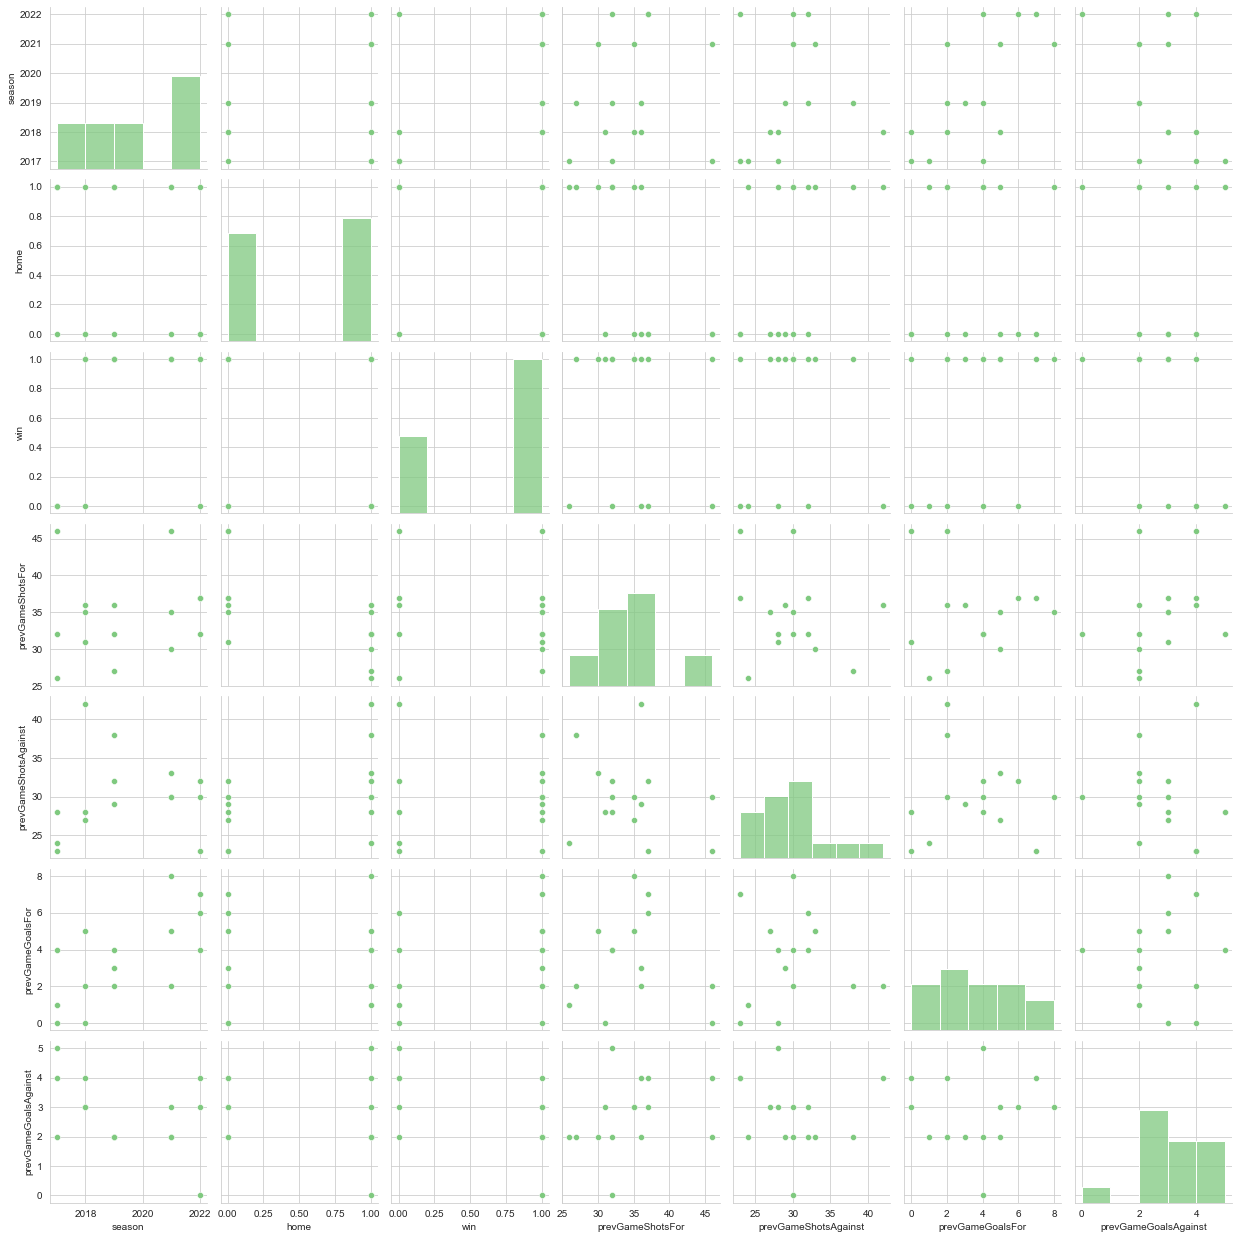

In [294]:
# look at correlation between the different data in df_opposingteam

sns.pairplot(df_opposingTeam)

In [295]:
# now implement logistic regression model 

y = df_opposingTeam['win']

In [296]:
X = df_opposingTeam[['home', 'prevGameShotsFor', 'prevGameShotsAgainst', 'prevGameGoalsFor', 'prevGameGoalsAgainst']]

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
# split data into test train split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [299]:
# now import Linear Regression 
from sklearn.linear_model import LogisticRegression

In [300]:
logistic_model = LogisticRegression()

In [301]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [302]:
# now predict values from the testing data
predictions = logistic_model.predict(X_test)

In [303]:
# create a classification report for the model 

from sklearn.metrics import classification_report

In [304]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [305]:
# make variable for accuracy 

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
print(accuracy)

0.6


In [322]:
# get user input for new prediction

input_home = input("Are oilers home or away?(1 for home, 0 for away): \n")
input_shotsFor = input("Amount of shots for last game: \n")
input_shotsAgainst = input("Amount of shots against last game: \n")
input_goalsFor = input("Amount of goals for last game: \n")
input_goalsAgainst = input("Amount of goals against last game: \n")



In [323]:
# now put this new input into new dataframe using dictionary formatting since it's only one row of data

data = [{'Home': input_home, 'Shorts For Last Game': input_shotsFor, 'Shots Against Last Game': input_shotsAgainst, 'Goals For Last Game': input_goalsFor, 
         'Goals Against Last Game': input_goalsAgainst}]

new_input = pd.DataFrame(data)

new_input


,Home,Shorts For Last Game,Shots Against Last Game,Goals For Last Game,Goals Against Last Game
0,1,24,33,2,7


In [325]:
# now use this new data in the logistic regression model

nextGame_prediction = logistic_model.predict(new_input)

if(nextGame_prediction==1):
    nextGame_prediction = "Win"
else:
    nextGame_prediction = "Loss"
print(nextGame_prediction)
print("Accuracy: ", accuracy)


Loss
Accuracy:  0.6
